# Latent Consistency Model
Latent Consistency Models (LCMs) enable fast high-quality image generation by directly predicting the reverse diffusion process in the latent rather than pixel space. In other words, LCMs try to predict the noiseless image from the noisy image in contrast to typical diffusion models that iteratively remove noise from the noisy image. By avoiding the iterative sampling process, LCMs are able to generate high-quality images in 2-4 steps instead of 20-30 steps.
https://huggingface.co/docs/diffusers/en/using-diffusers/inference_with_lcm

In [1]:
import numpy as np
import torch
from pathlib import Path
from diffusers.utils import load_image
from PIL import Image
from tqdm.auto import tqdm
from torchvision import transforms
import matplotlib.pyplot as plt
from IPython.display import clear_output
from diffusers import StableDiffusionPipeline,DDIMScheduler

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
model_id = 'stable-diffusion-v1-5/stable-diffusion-v1-5'
pipeline = StableDiffusionPipeline.from_pretrained(model_id,
                                                    safety_checker=None, 
                                                    torch_dtype=torch.float16).to(device)

pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

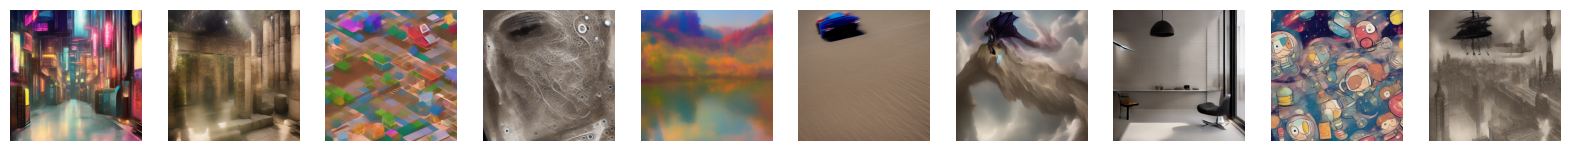

In [3]:
prompts = [
    "Cyberpunk alley at night, neon reflections, rainy atmosphere, high detail",
    "Ancient temple ruins in a dense jungle, soft golden sunlight, cinematic",
    "Stylized low poly village scene, bright colors, isometric view",
    "Ultra-realistic portrait of a robotic artisan, intricate metal textures",
    "A serene mountain lake at sunrise, painterly impressionist style",
    "Futuristic racing vehicle on a desert track, motion blur, dynamic angle",
    "Fantasy dragon perched on a cliff, storm clouds swirling, dramatic lighting",
    "Minimalist interior room design, clean lines, natural light",
    "Cute chibi astronaut floating in space, vibrant colors, kawaii style",
    "Steampunk airship above a victorian city, detailed gears and smoke"
]


gen_images=[]


for prompt in prompts:
    gen_image = pipeline(
                        prompt=prompt,
                        guidance_scale=7.5,
                        num_inference_steps=4,
                        height=512,
                        width=512,
                        generator=torch.manual_seed(42)
                    ).images[0]

    gen_images.append(gen_image)
    

fig,axes = plt.subplots(1,10,figsize=(20,10))
for i,ax in enumerate(axes):
    ax.imshow(gen_images[i])
    ax.axis('off')
plt.show()

# Apply Latent Consistensy Model (LCM) - LoRA

In [4]:
from diffusers import LCMScheduler
pipeline.scheduler = LCMScheduler.from_config(pipeline.scheduler.config)

The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [13]:
from diffusers import LCMScheduler
LCMScheduler?

Init signature:
LCMScheduler(
    num_train_timesteps: int = 1000,
    beta_start: float = 0.00085,
    beta_end: float = 0.012,
    beta_schedule: str = 'scaled_linear',
    trained_betas: Union[numpy.ndarray, List[float], NoneType] = None,
    original_inference_steps: int = 50,
    clip_sample: bool = False,
    clip_sample_range: float = 1.0,
    set_alpha_to_one: bool = True,
    steps_offset: int = 0,
    prediction_type: str = 'epsilon',
    thresholding: bool = False,
    dynamic_thresholding_ratio: float = 0.995,
    sample_max_value: float = 1.0,
    timestep_spacing: str = 'leading',
    timestep_scaling: float = 10.0,
    rescale_betas_zero_snr: bool = False,
)
Docstring:     
`LCMScheduler` extends the denoising procedure introduced in denoising diffusion probabilistic models (DDPMs) with
non-Markovian guidance.

This model inherits from [`SchedulerMixin`] and [`ConfigMixin`]. [`~ConfigMixin`] takes care of storing all config
attributes that are passed in the scheduler's `

In [5]:
adapter_id = "latent-consistency/lcm-lora-sdv1-5"
pipeline.load_lora_weights(adapter_id,adapter_name='lcm')

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

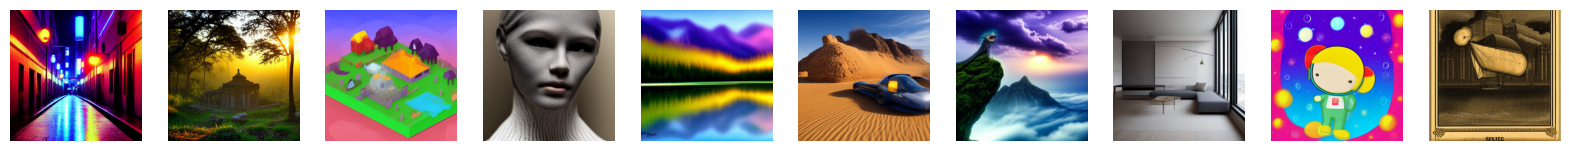

In [6]:
prompts = [
    "Cyberpunk alley at night, neon reflections, rainy atmosphere, high detail",
    "Ancient temple ruins in a dense jungle, soft golden sunlight, cinematic",
    "Stylized low poly village scene, bright colors, isometric view",
    "Ultra-realistic portrait of a robotic artisan, intricate metal textures",
    "A serene mountain lake at sunrise, painterly impressionist style",
    "Futuristic racing vehicle on a desert track, motion blur, dynamic angle",
    "Fantasy dragon perched on a cliff, storm clouds swirling, dramatic lighting",
    "Minimalist interior room design, clean lines, natural light",
    "Cute chibi astronaut floating in space, vibrant colors, kawaii style",
    "Steampunk airship above a victorian city, detailed gears and smoke"
]


gen_images=[]


for prompt in prompts:
    gen_image = pipeline(
                        prompt=prompt,
                        guidance_scale=0,
                        num_inference_steps=4,
                        height=512,
                        width=512,
                        cross_attention_kwargs={"scale": 1.0},
                        generator=torch.manual_seed(42)
                    ).images[0]

    gen_images.append(gen_image)
    

fig,axes = plt.subplots(1,10,figsize=(20,10))
for i,ax in enumerate(axes):
    ax.imshow(gen_images[i])
    ax.axis('off')
plt.show()

# Apply LCM with Controlnet

In [2]:
from diffusers import ControlNetModel,StableDiffusionControlNetPipeline
from diffusers import LCMScheduler
import torch
from diffusers.utils import load_image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model_id = 'stable-diffusion-v1-5/stable-diffusion-v1-5'
controlnet_id = 'lllyasviel/control_v11p_sd15_canny'
controlnet = ControlNetModel.from_pretrained(controlnet_id, torch_dtype=torch.float16).to('cuda')
controlnet_pipeline = StableDiffusionControlNetPipeline.from_pretrained(
                                                                        model_id, 
                                                                        controlnet=controlnet,
                                                                        safety_checker=None, 
                                                                        torch_dtype=torch.float16
                                                                    ).to(device)
controlnet_pipeline.scheduler = LCMScheduler.from_config(controlnet_pipeline.scheduler.config)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


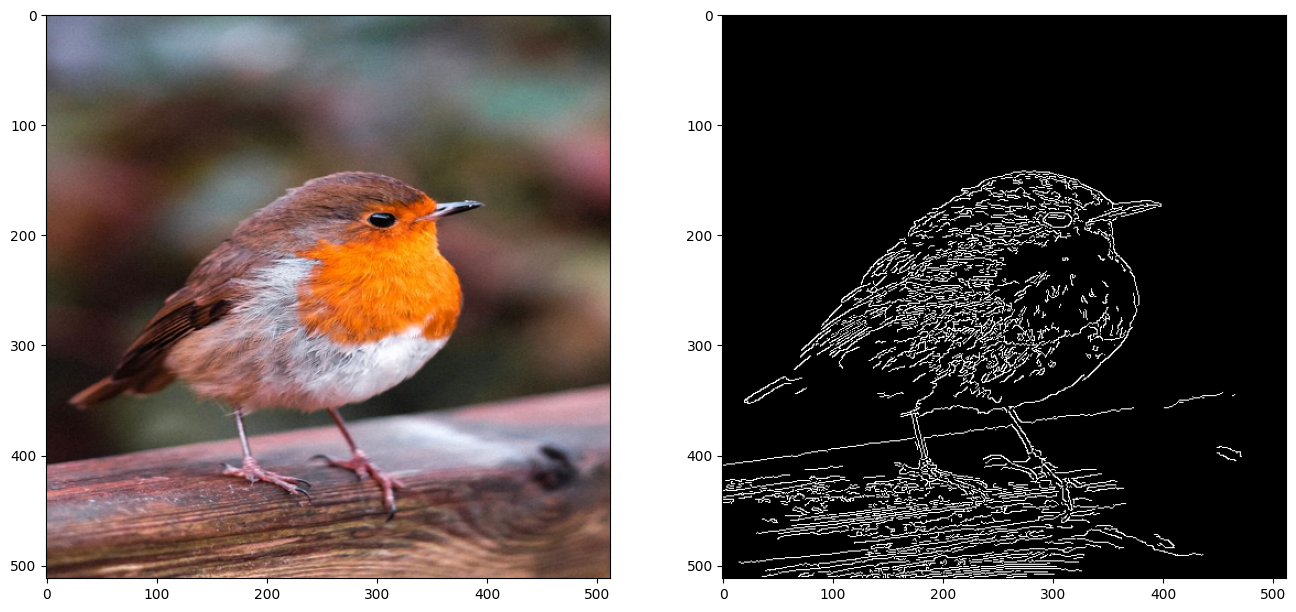

In [3]:

ref_image = load_image(
    "https://huggingface.co/lllyasviel/control_v11p_sd15_canny/resolve/main/images/input.png"
).resize((512,512))

image = np.array(ref_image)
low_threshold = 100
high_threshold = 200
image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
control_image = Image.fromarray(image)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(ref_image)
plt.subplot(1,2,2)
plt.imshow(control_image)
plt.show()

  0%|          | 0/4 [00:00<?, ?it/s]

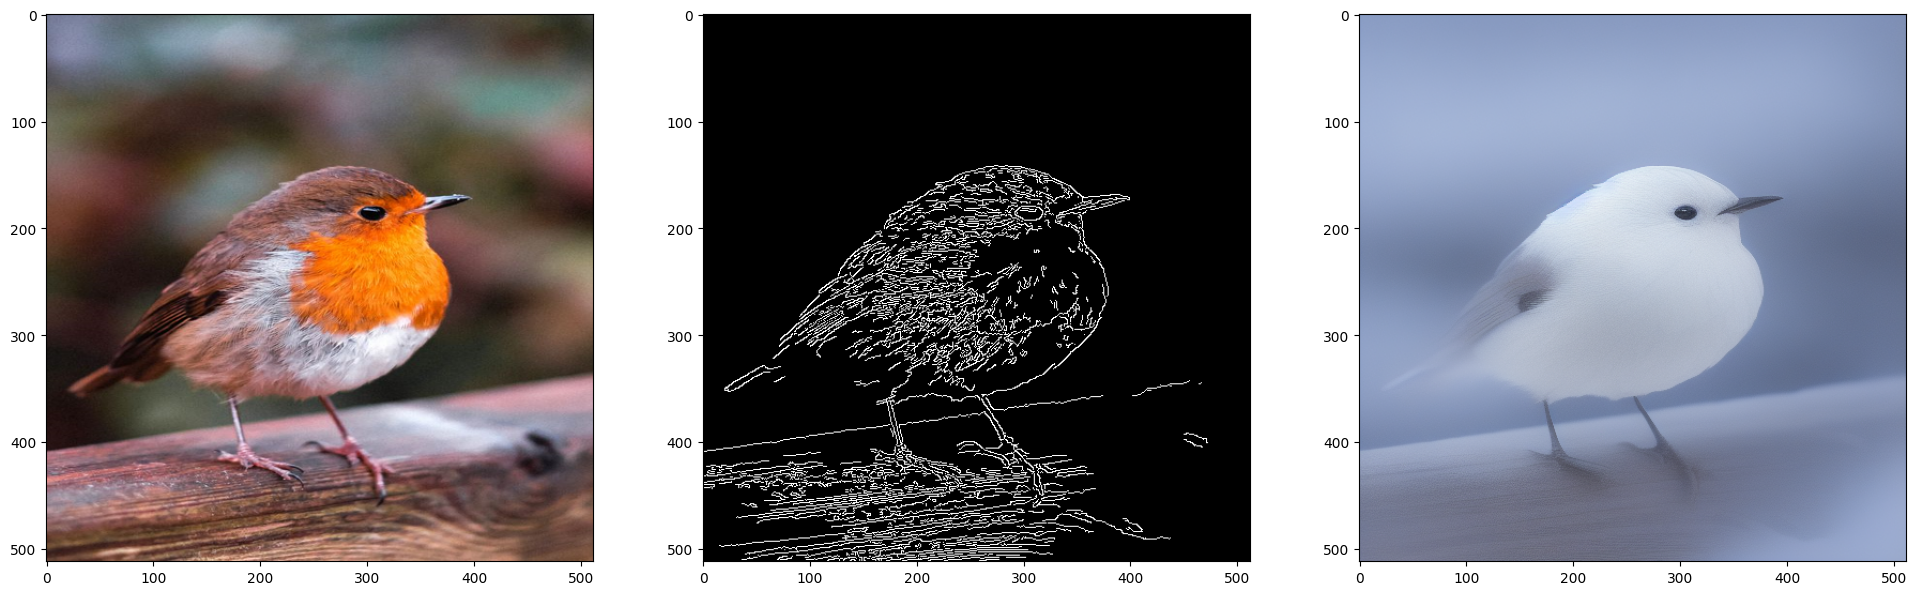

In [12]:
gen_image = controlnet_pipeline("a white paradise bird in the snow",
                  guidance_scale=4.0,
                  num_inference_steps=4, 
                  image=control_image,
                  controlnet_conditioning_scale=0.8,
                  cross_attention_kwargs={"scale": 1},
                  generator=torch.manual_seed(33) 
                  ).images[0]

plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
plt.imshow(ref_image)
plt.subplot(1,3,2)
plt.imshow(control_image)
plt.subplot(1,3,3)
plt.imshow(gen_image)
plt.show()